#                                   CAR PRICE PREDICTION

In [103]:
# importing libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(color_codes=True)
import math
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 
 



# Loading the Data set

In [104]:

CAR=pd.read_csv(r"C:\Users\LENOVO\Desktop\AI\CAR.csv")
CAR 

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,marque
0,0,Octavia,2017,10550,Manual,25250,Petrol,150.0,54.3,1.4,SKODA
1,1,Citigo,2018,8200,Manual,1264,Petrol,145.0,67.3,1.0,SKODA
2,2,Octavia,2019,15650,Automatic,6825,Diesel,145.0,67.3,2.0,SKODA
3,3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165.0,51.4,2.0,SKODA
4,4,Superb,2019,18350,Manual,10912,Petrol,150.0,40.9,1.5,SKODA
...,...,...,...,...,...,...,...,...,...,...,...
227592,13627,Tigra,2007,2499,Manual,48640,Petrol,165.0,46.3,1.4,Vauxhall
227593,13628,Vectra,2007,1795,Manual,75000,Petrol,240.0,39.2,1.8,Vauxhall
227594,13629,Vectra,2005,1495,Manual,74000,Petrol,235.0,38.7,1.8,Vauxhall
227595,13630,Vectra,2008,1695,Automatic,131000,Diesel,200.0,39.8,1.9,Vauxhall


In [105]:
## our target is the price varaible and our features are model,year,transmission, mileage , tax, engineSize and marque 

In [106]:
CAR['price'].isnull().sum()

0

In [107]:
CAR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227597 entries, 0 to 227596
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    227597 non-null  int64  
 1   model         227597 non-null  object 
 2   year          227597 non-null  int64  
 3   price         227597 non-null  int64  
 4   transmission  227597 non-null  object 
 5   mileage       227597 non-null  int64  
 6   fuelType      227597 non-null  object 
 7   tax           215900 non-null  float64
 8   mpg           223698 non-null  float64
 9   engineSize    227597 non-null  float64
 10  marque        227597 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 19.1+ MB


In [108]:
CAR.describe()

,Unnamed: 0,year,price,mileage,tax,mpg,engineSize
count,227597.000000,227597.000000,227597.000000,227597.000000,215900.000000,223698.000000,227597.000000
mean,6672.958440,2017.112563,17909.633343,23337.455779,120.301345,55.093028,1.721381
std,4467.785424,2.145373,9877.569902,21874.649068,62.330743,17.593066,0.578909
min,0.000000,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2844.000000,2016.000000,10990.000000,6923.000000,125.000000,47.100000,1.400000
50%,6137.000000,2017.000000,15950.000000,17307.000000,145.000000,55.060221,1.600000
75%,9922.000000,2019.000000,22290.000000,33000.000000,145.000000,61.400000,2.000000
max,17964.000000,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [109]:
CAR.isnull().sum()

Unnamed: 0          0
model               0
year                0
price               0
transmission        0
mileage             0
fuelType            0
tax             11697
mpg              3899
engineSize          0
marque              0
dtype: int64

# Data cleaning

In [110]:
CAR['mpg'].fillna(CAR['mpg'].mean(),inplace=True)
CAR['tax'].fillna(CAR['tax'].min(),inplace=True)


In [111]:
# label enconding for 'model' feature
encoder=LabelEncoder()
CAR['model']=encoder.fit_transform(CAR['model'])
CAR

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,marque
0,0,90,2017,10550,Manual,25250,Petrol,150.0,54.3,1.4,SKODA
1,1,42,2018,8200,Manual,1264,Petrol,145.0,67.3,1.0,SKODA
2,2,90,2019,15650,Automatic,6825,Diesel,145.0,67.3,2.0,SKODA
3,3,150,2015,14000,Automatic,28431,Diesel,165.0,51.4,2.0,SKODA
4,4,124,2019,18350,Manual,10912,Petrol,150.0,40.9,1.5,SKODA
...,...,...,...,...,...,...,...,...,...,...,...
227592,13627,128,2007,2499,Manual,48640,Petrol,165.0,46.3,1.4,Vauxhall
227593,13628,138,2007,1795,Manual,75000,Petrol,240.0,39.2,1.8,Vauxhall
227594,13629,138,2005,1495,Manual,74000,Petrol,235.0,38.7,1.8,Vauxhall
227595,13630,138,2008,1695,Automatic,131000,Diesel,200.0,39.8,1.9,Vauxhall


In [112]:
## label enconding for 'marque' feature
S=CAR['marque']
s={'marque':{'SKODA':1,'ford':2,'Audi':3,'BMW':4,'CCLASS':5,'VW':6,'Vauxhall':7,'MERC':8}}
CAR.replace(s,inplace=True)
CAR

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,marque
0,0,90,2017,10550,Manual,25250,Petrol,150.0,54.3,1.4,1
1,1,42,2018,8200,Manual,1264,Petrol,145.0,67.3,1.0,1
2,2,90,2019,15650,Automatic,6825,Diesel,145.0,67.3,2.0,1
3,3,150,2015,14000,Automatic,28431,Diesel,165.0,51.4,2.0,1
4,4,124,2019,18350,Manual,10912,Petrol,150.0,40.9,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...
227592,13627,128,2007,2499,Manual,48640,Petrol,165.0,46.3,1.4,7
227593,13628,138,2007,1795,Manual,75000,Petrol,240.0,39.2,1.8,7
227594,13629,138,2005,1495,Manual,74000,Petrol,235.0,38.7,1.8,7
227595,13630,138,2008,1695,Automatic,131000,Diesel,200.0,39.8,1.9,7


In [113]:
CAR['model'].value_counts()

52     19671
65     19452
27     19343
53     13764
92     13148
       ...  
105        2
160        1
159        1
158        1
157        1
Name: model, Length: 161, dtype: int64

In [114]:
#label enconding for 'transmission' feature
S=CAR['transmission']
s={'transmission':{'0':1,'Semi-Auto':2,'Manual':3,'1':4,'Automatic':5,'Other':6}}
CAR.replace(s,inplace=True)
CAR

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,marque
0,0,90,2017,10550,3,25250,Petrol,150.0,54.3,1.4,1
1,1,42,2018,8200,3,1264,Petrol,145.0,67.3,1.0,1
2,2,90,2019,15650,5,6825,Diesel,145.0,67.3,2.0,1
3,3,150,2015,14000,5,28431,Diesel,165.0,51.4,2.0,1
4,4,124,2019,18350,3,10912,Petrol,150.0,40.9,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...
227592,13627,128,2007,2499,3,48640,Petrol,165.0,46.3,1.4,7
227593,13628,138,2007,1795,3,75000,Petrol,240.0,39.2,1.8,7
227594,13629,138,2005,1495,3,74000,Petrol,235.0,38.7,1.8,7
227595,13630,138,2008,1695,5,131000,Diesel,200.0,39.8,1.9,7


In [115]:
CAR['transmission'].value_counts()

1    87349
2    61232
3    33690
4    28319
5    16997
6       10
Name: transmission, dtype: int64

In [116]:
CAR['transmission'].isnull().sum()

0

In [117]:
CAR['fuelType'].value_counts()

Diesel      105475
0            81713
Petrol       37163
Hybrid        2691
Other          536
Electric        19
Name: fuelType, dtype: int64

In [118]:
#label enconding for 'fuelType' feature
S=CAR['fuelType']
s={'fuelType':{'Diesel':1,'0':0.0,'Petrol':2,'Hybrid':3,'Other':4,'Electric':5}}
CAR.replace(s,inplace=True)
CAR

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,marque
0,0,90,2017,10550,3,25250,2.0,150.0,54.3,1.4,1
1,1,42,2018,8200,3,1264,2.0,145.0,67.3,1.0,1
2,2,90,2019,15650,5,6825,1.0,145.0,67.3,2.0,1
3,3,150,2015,14000,5,28431,1.0,165.0,51.4,2.0,1
4,4,124,2019,18350,3,10912,2.0,150.0,40.9,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...
227592,13627,128,2007,2499,3,48640,2.0,165.0,46.3,1.4,7
227593,13628,138,2007,1795,3,75000,2.0,240.0,39.2,1.8,7
227594,13629,138,2005,1495,3,74000,2.0,235.0,38.7,1.8,7
227595,13630,138,2008,1695,5,131000,1.0,200.0,39.8,1.9,7


In [119]:
CAR['engineSize']=abs(CAR['engineSize'])
CAR

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,marque
0,0,90,2017,10550,3,25250,2.0,150.0,54.3,1.4,1
1,1,42,2018,8200,3,1264,2.0,145.0,67.3,1.0,1
2,2,90,2019,15650,5,6825,1.0,145.0,67.3,2.0,1
3,3,150,2015,14000,5,28431,1.0,165.0,51.4,2.0,1
4,4,124,2019,18350,3,10912,2.0,150.0,40.9,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...
227592,13627,128,2007,2499,3,48640,2.0,165.0,46.3,1.4,7
227593,13628,138,2007,1795,3,75000,2.0,240.0,39.2,1.8,7
227594,13629,138,2005,1495,3,74000,2.0,235.0,38.7,1.8,7
227595,13630,138,2008,1695,5,131000,1.0,200.0,39.8,1.9,7


In [120]:
# dropping the unnamed column
CAR1=CAR.drop(['Unnamed: 0'],axis=1)
CAR1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,marque
0,90,2017,10550,3,25250,2.0,150.0,54.3,1.4,1
1,42,2018,8200,3,1264,2.0,145.0,67.3,1.0,1
2,90,2019,15650,5,6825,1.0,145.0,67.3,2.0,1
3,150,2015,14000,5,28431,1.0,165.0,51.4,2.0,1
4,124,2019,18350,3,10912,2.0,150.0,40.9,1.5,1
...,...,...,...,...,...,...,...,...,...,...
227592,128,2007,2499,3,48640,2.0,165.0,46.3,1.4,7
227593,138,2007,1795,3,75000,2.0,240.0,39.2,1.8,7
227594,138,2005,1495,3,74000,2.0,235.0,38.7,1.8,7
227595,138,2008,1695,5,131000,1.0,200.0,39.8,1.9,7


# Data viz

<function matplotlib.pyplot.show(close=None, block=None)>

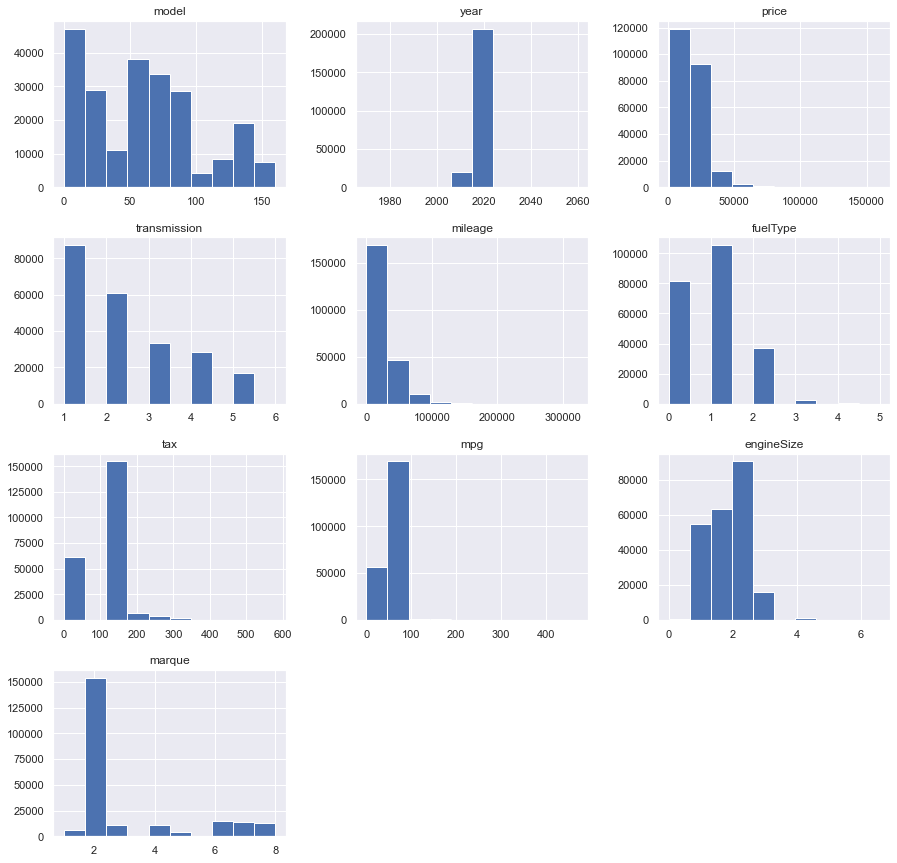

In [121]:
CAR1.hist(figsize=[15,15])
plt.show

In [122]:
CAR1['marque'].value_counts()

2    154074
6     15157
7     13632
8     13119
4     10781
3     10668
1      6267
5      3899
Name: marque, dtype: int64

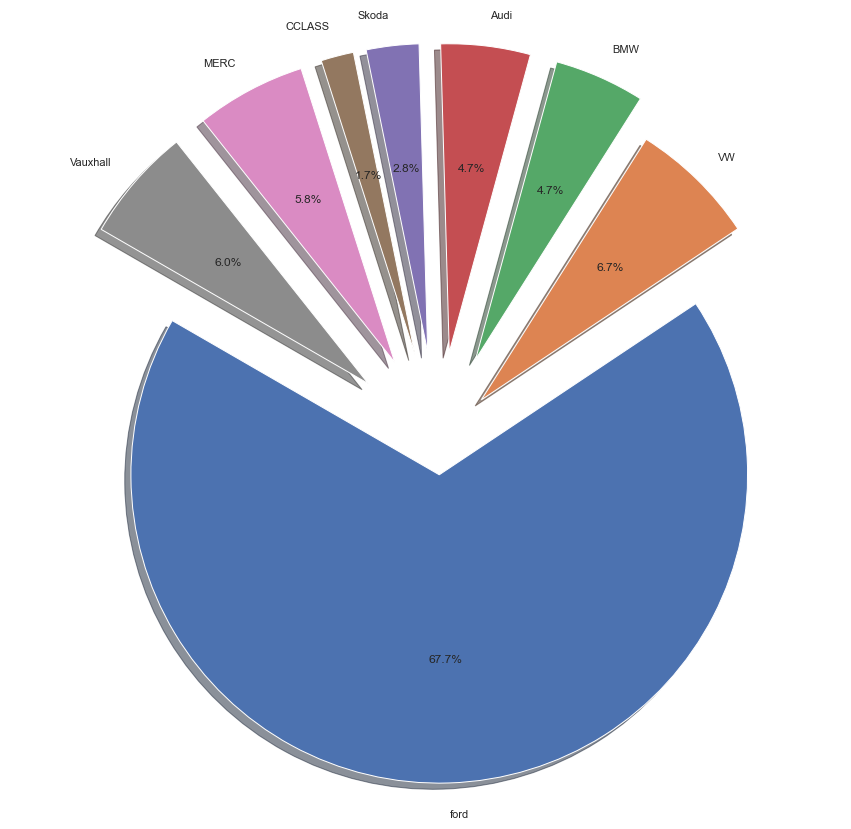

In [123]:
marque_count=[154074,15157,10781,10668,6267,3899,13119,13632]
labels=['ford','VW','BMW','Audi','Skoda','CCLASS','MERC','Vauxhall']
explode=[0.1,0.2,0.3,0.3,0.3,0.3,0.3,0.3]
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(marque_count, explode=explode,labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

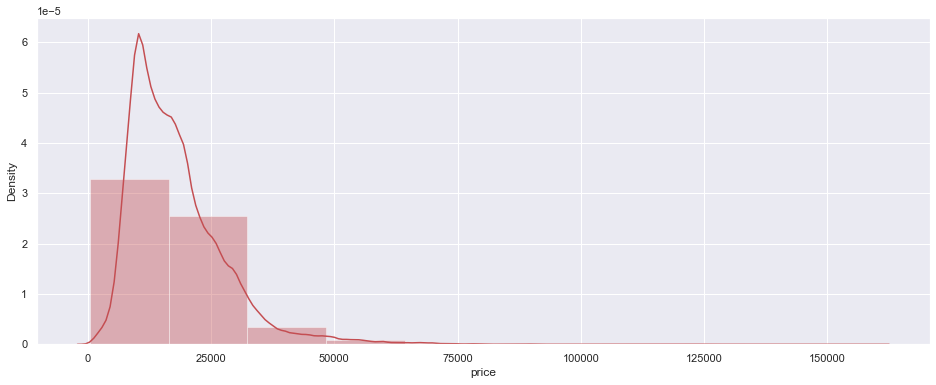

In [124]:
plt.figure(figsize=(16, 6))
sns.distplot(CAR1['price'],bins=10,hist=True,kde=True,color='r')

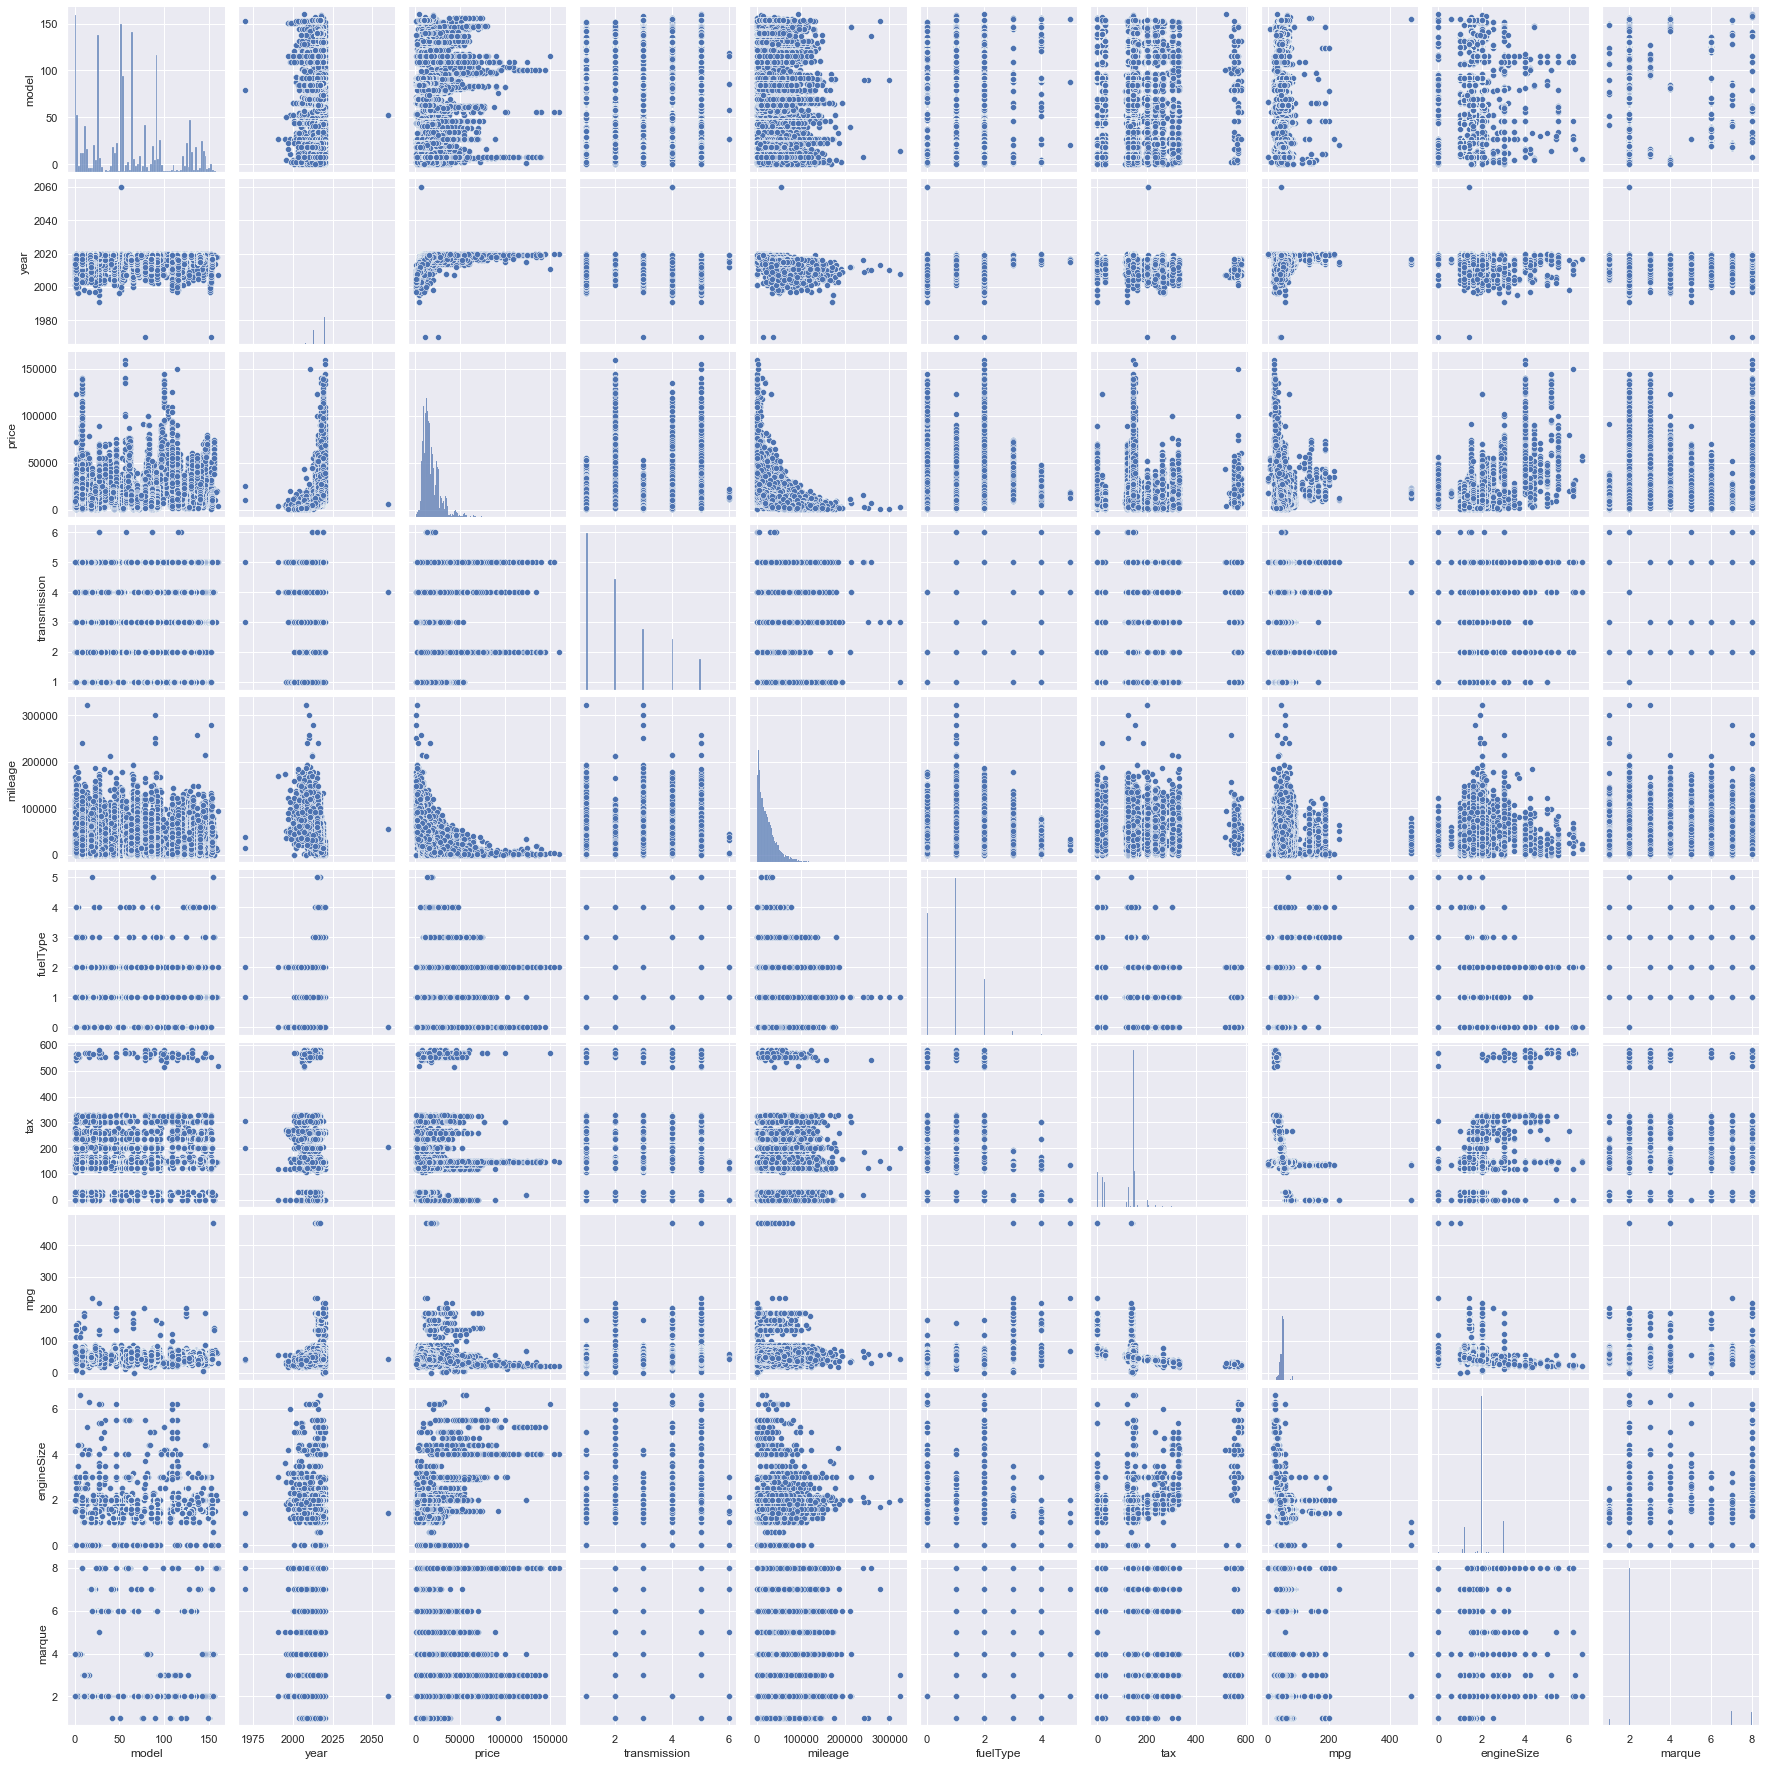

In [125]:
sns.pairplot(CAR1)

In [27]:
CAR1.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,marque
model,1.000000,0.058718,0.066150,-0.077974,-0.072752,-0.012129,0.167313,-0.105901,-0.064244,-0.042197
year,0.058718,1.000000,0.533301,0.020563,-0.750435,0.004240,0.171729,-0.130457,-0.035381,0.012448
price,0.066150,0.533301,1.000000,0.264582,-0.463346,0.107015,0.246305,-0.283722,0.612405,0.046307
transmission,-0.077974,0.020563,0.264582,1.000000,0.016026,0.428623,0.095640,-0.071974,0.324058,0.387890
mileage,-0.072752,-0.750435,-0.463346,0.016026,1.000000,0.060582,-0.201596,0.179366,0.099506,-0.010386
fuelType,-0.012129,0.004240,0.107015,0.428623,0.060582,1.000000,-0.008823,0.147827,0.185008,0.503167
tax,0.167313,0.171729,0.246305,0.095640,-0.201596,-0.008823,1.000000,-0.377625,0.222647,0.044127
mpg,-0.105901,-0.130457,-0.283722,-0.071974,0.179366,0.147827,-0.377625,1.000000,-0.258545,-0.044176
engineSize,-0.064244,-0.035381,0.612405,0.324058,0.099506,0.185008,0.222647,-0.258545,1.000000,0.064879
marque,-0.042197,0.012448,0.046307,0.387890,-0.010386,0.503167,0.044127,-0.044176,0.064879,1.000000


In [126]:
CAR_GROUPBY=CAR[["price", "engineSize"]].groupby(["price"], as_index=True).mean()
CAR_GROUPBY

,engineSize
price,
450,1.400000
495,1.450000
590,1.200000
650,1.400000
675,1.933333
...,...
140319,4.000000
145000,5.200000
149948,6.200000


<Figure size 1080x1080 with 0 Axes>

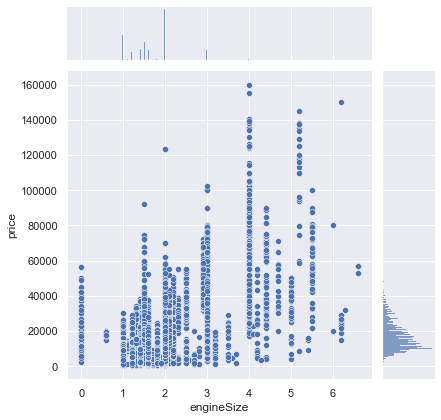

In [127]:
plt.figure(figsize=(15,15))
sns.jointplot(x='engineSize',y='price',data=CAR1)

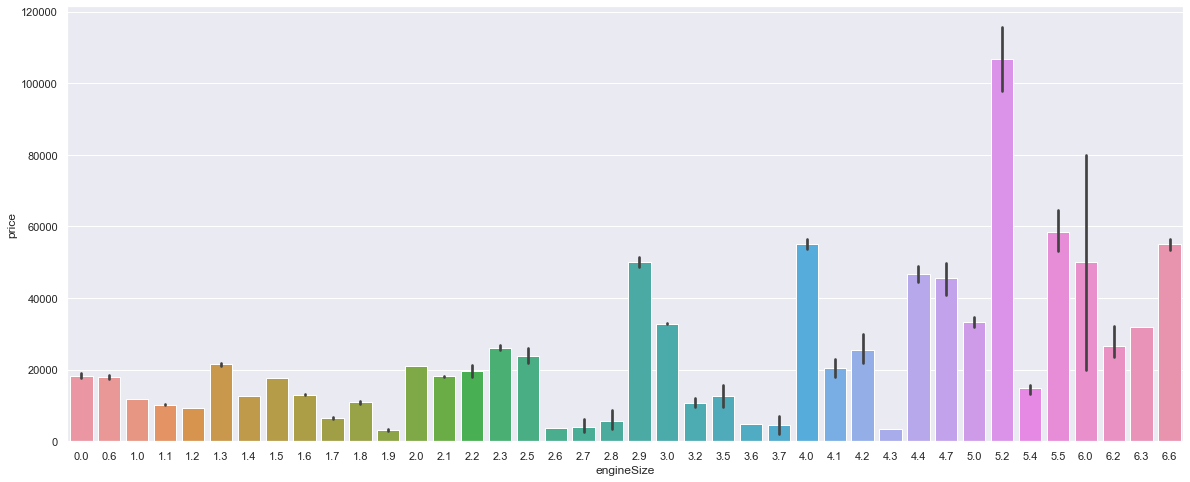

In [128]:
plt.figure(figsize=(20,8))
sns.barplot(x="engineSize", y="price",data=CAR1)
plt.show()

In [129]:
# Scaling

In [130]:
scaler=StandardScaler()
CAR1['price']=scaler.fit_transform(CAR1[['price']].values)
CAR1['mileage']=scaler.fit_transform(CAR1[['mileage']].values)
CAR1['engineSize']=scaler.fit_transform(CAR1[['engineSize']].values)
CAR1['tax']=scaler.fit_transform(CAR1[['tax']].values)
CAR1['mpg']=scaler.fit_transform(CAR1[['mpg']].values)
CAR1['marque']=scaler.fit_transform(CAR1[['marque']].values)
CAR1['transmission']=scaler.fit_transform(CAR1[['transmission']].values)
CAR1['model']=scaler.fit_transform(CAR1[['model']].values)



# Regression


#    linear regression

In [131]:
y=CAR1[['price']].values
x=CAR1[['engineSize']].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)
x_train,x_test,y_train,y_test


(array([[ 3.93606356],
        [ 0.481284  ],
        [ 1.69045685],
        ...,
        [-1.24610578],
        [ 2.20867378],
        [-0.20967191]]),
 array([[-1.24610578],
        [ 0.481284  ],
        [ 0.481284  ],
        ...,
        [-0.55514986],
        [ 0.481284  ],
        [ 0.481284  ]]),
 array([[ 3.08673428],
        [ 0.11869005],
        [-1.68206047],
        ...,
        [-0.69973167],
        [ 0.24179752],
        [-0.12307035]]),
 array([[-0.09229348],
        [ 0.31236159],
        [-0.24445675],
        ...,
        [-1.20582893],
        [ 0.4090455 ],
        [ 1.03166965]]))

In [132]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.619049178301089
R squared 0.38143908734591536


In [133]:
predicted=model.predict([[1.4]])
predicted

array([[0.854399]])

In [134]:
print(model.coef_)
print(model.intercept_)

[[0.61096621]]
[-0.00095369]


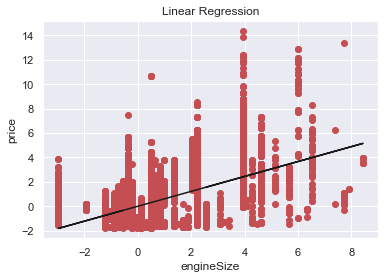

In [135]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel('engineSize')
plt.plot(x,model.predict(x),color="k")
plt.show()

#  Multilinear regression

In [136]:
x=CAR1[['year','model','transmission','tax','engineSize','marque']]  #we have more than one input
y=CAR1["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=30) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.19395208822283794
R squared 0.8075487688151276


# Ploynomial regression

In [137]:
x= CAR1[['year','model','transmission','tax','engineSize','marque']]
y= CAR1["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=30)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  0.08032084003864964
R squared:  0.920300705721295


In [138]:
x= CAR1[['year','model','transmission','tax','engineSize','marque']]
y= CAR1["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=30)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=4)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  0.07287151504247769
R squared:  0.9276923856982715


In [146]:
x= CAR1[['year','model','transmission','tax','engineSize','marque']]
y= CAR1["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=30)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=5)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  0.07652979498402496
R squared:  0.9240624145790083


In [147]:
# Polynomial regression with degree 4 gives us the best results in terms of MSE and R squared

In [148]:
AP = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted.flatten()})
AP

,Actual,Predicted
0,-0.092293,-0.393087
1,0.312362,0.368836
2,-0.244457,-0.247271
3,-0.041471,0.145781
4,-0.092091,-0.064080
5,-0.953135,-0.689312
6,1.425998,1.053784
7,-0.497556,-0.168141
8,0.604438,0.479185
9,2.169199,2.660183


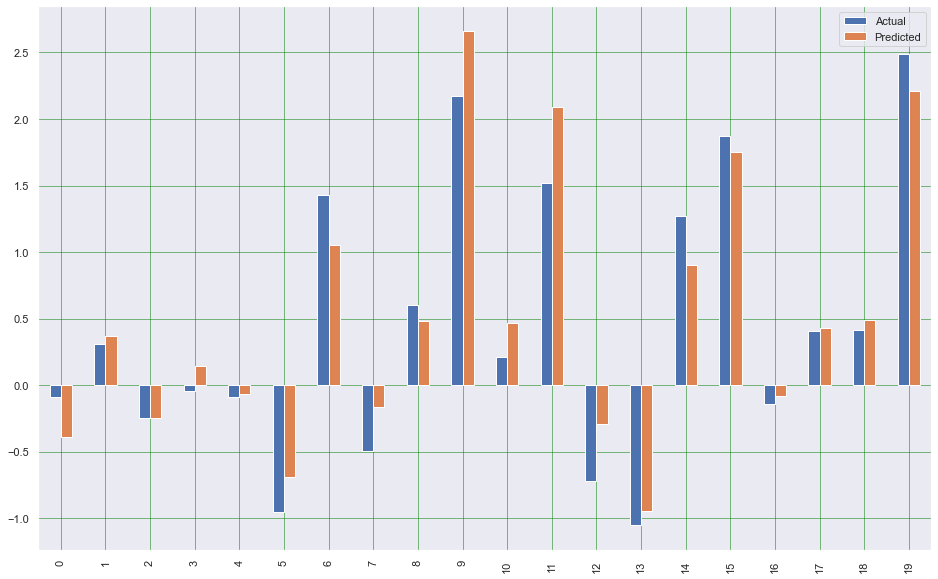

In [149]:
AP1= AP.head(20)
AP1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()